In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [ ]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



In [2]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [3]:
population_model = "PBH-CC-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_3/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=0.6, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'Mf': Uniform(minimum=1.0, maximum=50.0, name='$M$', latex_label='$M$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

23:23 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-CC-2nd_flatLCDM_2/'
23:23 bilby INFO    : Search parameters:
23:23 bilby INFO    :   α = Uniform(minimum=0.6, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
23:23 bilby INFO    :   Mf = Uniform(minimum=1.0, maximum=50.0, name='$M$', latex_label='$M$', unit=None, boundary=None)
23:23 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
23:23 bilby INFO    :   H0 = 67.4
23:23 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:139: RuntimeWarning: divide by zero encountered in log
23:25 bilby INFO    : Single likelihood evaluation took 1.214e+00 s


0it [00:00, ?it/s]

23:25 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f94b25919d0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
23:25 bilby INFO    : Checkpoint every check_point_delta_t = 120s
23:25 bilby INFO    : Using dynesty version 1.0.1
23:25 bilby INFO    : Using the bilby-implemented rwalk samp

739it [23:55,  2.82it/s, bound:0 nc: 16 ncall:2.5e+03 eff:29.6% logz=-1197.98+/-0.14 dlogz:140.864>0.1]   

23:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1023it [26:22,  1.37it/s, bound:0 nc:  4 ncall:4.5e+03 eff:22.7% logz=-1157.76+/-0.14 dlogz:106.316>0.1]

23:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1214it [29:56,  1.38s/it, bound:0 nc:  5 ncall:6.5e+03 eff:18.6% logz=-1138.65+/-0.15 dlogz:87.271>0.1] 

23:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1275it [32:02,  2.15s/it, bound:0 nc: 14 ncall:7.5e+03 eff:16.9% logz=-1132.32+/-0.15 dlogz:80.793>0.1]

23:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1339it [34:06,  1.67s/it, bound:0 nc: 34 ncall:8.6e+03 eff:15.6% logz=-1127.08+/-0.15 dlogz:75.406>0.1]

23:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1379it [36:13,  5.37s/it, bound:0 nc:140 ncall:9.6e+03 eff:14.3% logz=-1124.52+/-0.14 dlogz:72.763>0.1]

00:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1427it [38:22,  4.17s/it, bound:0 nc: 47 ncall:1.1e+04 eff:13.4% logz=-1121.47+/-0.15 dlogz:69.874>0.1]

00:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1479it [40:27,  2.68s/it, bound:0 nc: 50 ncall:1.2e+04 eff:12.7% logz=-1118.13+/-0.15 dlogz:66.396>0.1]

00:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1518it [42:36,  3.02s/it, bound:0 nc: 52 ncall:1.3e+04 eff:12.0% logz=-1115.81+/-0.15 dlogz:64.019>0.1]

00:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1549it [44:46,  6.66s/it, bound:0 nc:111 ncall:1.4e+04 eff:11.3% logz=-1113.81+/-0.15 dlogz:61.949>0.1]

00:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1587it [46:58,  5.97s/it, bound:0 nc: 56 ncall:1.5e+04 eff:10.8% logz=-1111.48+/-0.15 dlogz:59.545>0.1]

00:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1615it [49:11,  3.17s/it, bound:0 nc: 24 ncall:1.6e+04 eff:10.3% logz=-1109.71+/-0.15 dlogz:57.738>0.1]

00:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1644it [51:18, 11.72s/it, bound:1 nc: 38 ncall:1.6e+04 eff:10.0% logz=-1107.69+/-0.15 dlogz:55.646>0.1]

00:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1705it [53:21,  2.45s/it, bound:7 nc: 27 ncall:1.8e+04 eff:9.3% logz=-1104.29+/-0.15 dlogz:52.514>0.1] 

00:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1768it [55:34,  2.28s/it, bound:13 nc: 24 ncall:2.0e+04 eff:8.7% logz=-1100.72+/-0.15 dlogz:49.267>0.1]

00:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1826it [57:49,  2.45s/it, bound:18 nc: 37 ncall:2.2e+04 eff:8.2% logz=-1098.17+/-0.15 dlogz:46.596>0.1]

00:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1885it [1:00:05,  2.53s/it, bound:24 nc: 35 ncall:2.4e+04 eff:7.8% logz=-1095.32+/-0.15 dlogz:44.391>0.1]

00:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1973it [1:03:31,  2.40s/it, bound:33 nc: 24 ncall:2.7e+04 eff:7.3% logz=-1091.38+/-0.15 dlogz:40.267>0.1]

00:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2063it [1:07:07,  2.39s/it, bound:43 nc: 28 ncall:3.0e+04 eff:6.9% logz=-1087.82+/-0.16 dlogz:36.536>0.1]

00:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2125it [1:09:30,  2.33s/it, bound:50 nc: 36 ncall:3.2e+04 eff:6.6% logz=-1085.64+/-0.16 dlogz:34.231>0.1]

00:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2175it [1:11:42,  2.48s/it, bound:56 nc: 29 ncall:3.4e+04 eff:6.4% logz=-1083.95+/-0.16 dlogz:32.431>0.1]

00:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2229it [1:14:02,  2.54s/it, bound:62 nc: 51 ncall:3.6e+04 eff:6.2% logz=-1082.00+/-0.16 dlogz:30.374>0.1]

00:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2285it [1:17:07,  3.17s/it, bound:68 nc: 29 ncall:3.8e+04 eff:6.0% logz=-1080.44+/-0.16 dlogz:29.724>0.1]

00:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2313it [1:19:10,  3.87s/it, bound:71 nc: 34 ncall:3.9e+04 eff:6.0% logz=-1079.52+/-0.16 dlogz:28.757>0.1]

00:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2344it [1:21:17,  4.18s/it, bound:74 nc: 34 ncall:4.0e+04 eff:5.9% logz=-1078.52+/-0.16 dlogz:27.684>0.1]

00:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2403it [1:25:13,  4.20s/it, bound:80 nc: 37 ncall:4.2e+04 eff:5.8% logz=-1076.84+/-0.16 dlogz:25.888>0.1]

00:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2435it [1:27:21,  4.32s/it, bound:83 nc: 25 ncall:4.3e+04 eff:5.7% logz=-1075.86+/-0.16 dlogz:24.846>0.1]

00:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2465it [1:29:22,  4.41s/it, bound:87 nc: 63 ncall:4.4e+04 eff:5.6% logz=-1075.01+/-0.16 dlogz:23.935>0.1]

00:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2495it [1:31:29,  4.53s/it, bound:90 nc: 65 ncall:4.5e+04 eff:5.6% logz=-1074.15+/-0.16 dlogz:23.005>0.1]

00:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2525it [1:33:36,  4.55s/it, bound:93 nc: 27 ncall:4.6e+04 eff:5.5% logz=-1073.44+/-0.16 dlogz:22.238>0.1]

00:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2554it [1:35:48,  4.78s/it, bound:96 nc: 63 ncall:4.7e+04 eff:5.4% logz=-1072.80+/-0.16 dlogz:21.535>0.1]

01:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2585it [1:37:57,  4.66s/it, bound:100 nc: 23 ncall:4.8e+04 eff:5.4% logz=-1072.11+/-0.16 dlogz:20.789>0.1]

01:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2616it [1:40:12,  4.76s/it, bound:103 nc: 34 ncall:4.9e+04 eff:5.3% logz=-1071.45+/-0.16 dlogz:20.067>0.1]

01:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2646it [1:42:20,  4.73s/it, bound:106 nc: 27 ncall:5.0e+04 eff:5.3% logz=-1070.83+/-0.16 dlogz:19.384>0.1]

01:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2677it [1:44:34,  4.75s/it, bound:109 nc: 32 ncall:5.1e+04 eff:5.2% logz=-1070.24+/-0.16 dlogz:18.732>0.1]

01:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2709it [1:46:39,  4.48s/it, bound:113 nc: 36 ncall:5.2e+04 eff:5.2% logz=-1069.61+/-0.16 dlogz:18.040>0.1]

01:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2738it [1:48:42,  4.53s/it, bound:116 nc: 28 ncall:5.3e+04 eff:5.2% logz=-1069.02+/-0.16 dlogz:17.388>0.1]

01:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2767it [1:50:53,  4.79s/it, bound:119 nc: 38 ncall:5.4e+04 eff:5.1% logz=-1068.50+/-0.16 dlogz:16.804>0.1]

01:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2799it [1:52:55,  4.50s/it, bound:122 nc: 35 ncall:5.5e+04 eff:5.1% logz=-1067.95+/-0.16 dlogz:16.193>0.1]

01:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2830it [1:55:07,  4.59s/it, bound:125 nc: 35 ncall:5.6e+04 eff:5.0% logz=-1067.45+/-0.16 dlogz:15.636>0.1]

01:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2860it [1:57:23,  4.83s/it, bound:129 nc: 30 ncall:5.7e+04 eff:5.0% logz=-1066.98+/-0.16 dlogz:15.096>0.1]

01:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2891it [1:59:38,  4.76s/it, bound:132 nc: 63 ncall:5.8e+04 eff:5.0% logz=-1066.48+/-0.16 dlogz:14.541>0.1]

01:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2918it [2:01:51,  4.96s/it, bound:135 nc: 24 ncall:5.9e+04 eff:4.9% logz=-1066.04+/-0.17 dlogz:14.045>0.1]

01:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2948it [2:04:03,  4.82s/it, bound:139 nc: 33 ncall:6.0e+04 eff:4.9% logz=-1065.60+/-0.17 dlogz:13.537>0.1]

01:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2979it [2:06:22,  4.74s/it, bound:142 nc: 33 ncall:6.1e+04 eff:4.8% logz=-1065.19+/-0.17 dlogz:13.068>0.1]

01:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3010it [2:08:45,  4.80s/it, bound:145 nc: 33 ncall:6.3e+04 eff:4.8% logz=-1064.81+/-0.16 dlogz:12.629>0.1]

01:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3042it [2:11:05,  4.63s/it, bound:149 nc: 28 ncall:6.4e+04 eff:4.8% logz=-1064.41+/-0.17 dlogz:12.163>0.1]

01:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3074it [2:13:35,  5.42s/it, bound:152 nc: 36 ncall:6.5e+04 eff:4.7% logz=-1064.00+/-0.17 dlogz:11.690>0.1]

01:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3099it [2:15:50,  6.14s/it, bound:156 nc: 68 ncall:6.6e+04 eff:4.7% logz=-1063.68+/-0.17 dlogz:11.322>0.1]

01:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3127it [2:18:12,  6.42s/it, bound:159 nc: 40 ncall:6.7e+04 eff:4.7% logz=-1063.35+/-0.17 dlogz:10.933>0.1]

01:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3155it [2:20:26,  6.23s/it, bound:163 nc: 32 ncall:6.8e+04 eff:4.6% logz=-1063.05+/-0.17 dlogz:10.571>0.1]

01:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3184it [2:22:33,  5.89s/it, bound:166 nc: 29 ncall:6.9e+04 eff:4.6% logz=-1062.74+/-0.17 dlogz:10.207>0.1]

01:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3214it [2:24:43,  5.64s/it, bound:169 nc: 36 ncall:7.0e+04 eff:4.6% logz=-1062.43+/-0.17 dlogz:9.840>0.1] 

01:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3246it [2:26:56,  5.34s/it, bound:172 nc: 36 ncall:7.1e+04 eff:4.6% logz=-1062.13+/-0.17 dlogz:9.475>0.1]

01:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3278it [2:29:09,  5.17s/it, bound:176 nc: 30 ncall:7.2e+04 eff:4.5% logz=-1061.84+/-0.17 dlogz:9.118>0.1]

01:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3310it [2:31:35,  5.31s/it, bound:179 nc: 71 ncall:7.3e+04 eff:4.5% logz=-1061.55+/-0.17 dlogz:8.765>0.1]

01:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3340it [2:33:59,  5.44s/it, bound:182 nc: 34 ncall:7.4e+04 eff:4.5% logz=-1061.29+/-0.17 dlogz:8.444>0.1]

01:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3369it [2:36:16,  5.46s/it, bound:186 nc: 33 ncall:7.5e+04 eff:4.5% logz=-1061.05+/-0.17 dlogz:8.145>0.1]

02:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3399it [2:38:39,  5.44s/it, bound:189 nc: 71 ncall:7.7e+04 eff:4.4% logz=-1060.79+/-0.17 dlogz:7.824>0.1]

02:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3430it [2:40:56,  5.16s/it, bound:193 nc: 32 ncall:7.8e+04 eff:4.4% logz=-1060.54+/-0.17 dlogz:7.510>0.1]

02:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3462it [2:43:16,  4.98s/it, bound:196 nc: 31 ncall:7.9e+04 eff:4.4% logz=-1060.29+/-0.17 dlogz:7.201>0.1]

02:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3494it [2:45:30,  4.73s/it, bound:199 nc: 29 ncall:8.0e+04 eff:4.4% logz=-1060.07+/-0.17 dlogz:6.917>0.1]

02:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3524it [2:47:45,  4.77s/it, bound:203 nc: 35 ncall:8.1e+04 eff:4.4% logz=-1059.88+/-0.17 dlogz:6.665>0.1]

02:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3553it [2:49:58,  4.78s/it, bound:206 nc: 33 ncall:8.2e+04 eff:4.3% logz=-1059.70+/-0.17 dlogz:6.427>0.1]

02:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3583it [2:52:17,  4.81s/it, bound:209 nc: 33 ncall:8.3e+04 eff:4.3% logz=-1059.52+/-0.17 dlogz:6.185>0.1]

02:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3613it [2:54:25,  4.61s/it, bound:212 nc: 38 ncall:8.4e+04 eff:4.3% logz=-1059.35+/-0.17 dlogz:5.954>0.1]

02:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3644it [2:56:45,  4.63s/it, bound:216 nc: 36 ncall:8.5e+04 eff:4.3% logz=-1059.18+/-0.17 dlogz:5.725>0.1]

02:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3674it [2:59:00,  4.62s/it, bound:219 nc: 36 ncall:8.6e+04 eff:4.3% logz=-1059.02+/-0.17 dlogz:5.507>0.1]

02:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3705it [3:01:13,  5.17s/it, bound:223 nc: 36 ncall:8.7e+04 eff:4.3% logz=-1058.85+/-0.17 dlogz:5.281>0.1]

02:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3735it [3:03:39,  5.81s/it, bound:226 nc: 32 ncall:8.8e+04 eff:4.2% logz=-1058.70+/-0.17 dlogz:5.070>0.1]

02:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3766it [3:06:07,  5.98s/it, bound:230 nc: 33 ncall:8.9e+04 eff:4.2% logz=-1058.55+/-0.17 dlogz:4.860>0.1]

02:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3795it [3:08:27,  6.08s/it, bound:233 nc: 31 ncall:9.0e+04 eff:4.2% logz=-1058.42+/-0.17 dlogz:4.674>0.1]

02:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:34 bilby INFO    : Writing 100 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3826it [3:10:54,  6.08s/it, bound:237 nc: 32 ncall:9.2e+04 eff:4.2% logz=-1058.29+/-0.17 dlogz:4.480>0.1]

02:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:36 bilby INFO    : Writing 106 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3851it [3:13:22,  6.73s/it, bound:240 nc: 60 ncall:9.3e+04 eff:4.2% logz=-1058.19+/-0.17 dlogz:4.327>0.1]

02:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:38 bilby INFO    : Writing 115 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3880it [3:15:51,  6.40s/it, bound:243 nc: 32 ncall:9.4e+04 eff:4.1% logz=-1058.07+/-0.17 dlogz:4.156>0.1]

02:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:41 bilby INFO    : Writing 117 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3908it [3:18:13,  6.04s/it, bound:247 nc: 35 ncall:9.5e+04 eff:4.1% logz=-1057.96+/-0.17 dlogz:3.997>0.1]

02:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:43 bilby INFO    : Writing 123 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3940it [3:20:31,  5.34s/it, bound:250 nc: 35 ncall:9.6e+04 eff:4.1% logz=-1057.85+/-0.17 dlogz:3.820>0.1]

02:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:46 bilby INFO    : Writing 132 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3970it [3:22:42,  5.01s/it, bound:254 nc: 31 ncall:9.7e+04 eff:4.1% logz=-1057.74+/-0.17 dlogz:3.656>0.1]

02:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:48 bilby INFO    : Writing 125 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4001it [3:24:53,  4.72s/it, bound:258 nc: 35 ncall:9.8e+04 eff:4.1% logz=-1057.63+/-0.17 dlogz:3.502>0.1]

02:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:50 bilby INFO    : Writing 149 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4031it [3:27:16,  4.81s/it, bound:261 nc: 37 ncall:9.9e+04 eff:4.1% logz=-1057.54+/-0.17 dlogz:3.376>0.1]

02:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:52 bilby INFO    : Writing 151 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4061it [3:29:43,  5.61s/it, bound:265 nc: 70 ncall:1.0e+05 eff:4.0% logz=-1057.44+/-0.17 dlogz:3.228>0.1]

02:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:55 bilby INFO    : Writing 172 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4092it [3:32:09,  5.90s/it, bound:268 nc: 36 ncall:1.0e+05 eff:4.0% logz=-1057.35+/-0.17 dlogz:3.080>0.1]

02:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
02:57 bilby INFO    : Writing 166 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4123it [3:34:33,  5.85s/it, bound:272 nc: 38 ncall:1.0e+05 eff:4.0% logz=-1057.26+/-0.17 dlogz:2.937>0.1]

03:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:00 bilby INFO    : Writing 192 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4154it [3:37:12,  5.93s/it, bound:276 nc: 40 ncall:1.0e+05 eff:4.0% logz=-1057.18+/-0.17 dlogz:2.800>0.1]

03:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:02 bilby INFO    : Writing 197 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4185it [3:39:30,  5.40s/it, bound:279 nc: 39 ncall:1.1e+05 eff:4.0% logz=-1057.10+/-0.17 dlogz:2.667>0.1]

03:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:05 bilby INFO    : Writing 203 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4216it [3:41:56,  5.17s/it, bound:283 nc: 37 ncall:1.1e+05 eff:4.0% logz=-1057.02+/-0.17 dlogz:2.539>0.1]

03:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:07 bilby INFO    : Writing 207 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4246it [3:44:11,  4.86s/it, bound:286 nc: 37 ncall:1.1e+05 eff:3.9% logz=-1056.95+/-0.17 dlogz:2.419>0.1]

03:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:09 bilby INFO    : Writing 247 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4278it [3:46:25,  5.15s/it, bound:290 nc: 39 ncall:1.1e+05 eff:3.9% logz=-1056.88+/-0.17 dlogz:2.294>0.1]

03:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:12 bilby INFO    : Writing 244 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4307it [3:48:43,  5.56s/it, bound:294 nc: 39 ncall:1.1e+05 eff:3.9% logz=-1056.81+/-0.17 dlogz:2.185>0.1]

03:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:14 bilby INFO    : Writing 233 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4339it [3:51:11,  5.50s/it, bound:298 nc: 35 ncall:1.1e+05 eff:3.9% logz=-1056.74+/-0.17 dlogz:2.104>0.1]

03:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:16 bilby INFO    : Writing 252 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4371it [3:53:28,  5.14s/it, bound:302 nc: 40 ncall:1.1e+05 eff:3.9% logz=-1056.68+/-0.17 dlogz:1.990>0.1]

03:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:19 bilby INFO    : Writing 303 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4400it [3:55:56,  5.33s/it, bound:305 nc: 70 ncall:1.1e+05 eff:3.9% logz=-1056.62+/-0.17 dlogz:1.891>0.1]

03:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:21 bilby INFO    : Writing 293 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4429it [3:58:18,  5.20s/it, bound:309 nc: 40 ncall:1.1e+05 eff:3.9% logz=-1056.56+/-0.17 dlogz:1.795>0.1]

03:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:23 bilby INFO    : Writing 321 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4459it [4:00:42,  5.75s/it, bound:313 nc: 36 ncall:1.2e+05 eff:3.8% logz=-1056.51+/-0.17 dlogz:1.699>0.1]

03:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:26 bilby INFO    : Writing 338 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4515it [4:04:02,  4.34s/it, bound:320 nc: 78 ncall:1.2e+05 eff:3.8% logz=-1056.41+/-0.17 dlogz:1.532>0.1]

03:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:29 bilby INFO    : Writing 349 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4572it [4:06:39,  3.37s/it, bound:328 nc: 37 ncall:1.2e+05 eff:3.8% logz=-1056.32+/-0.17 dlogz:1.375>0.1]

03:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:32 bilby INFO    : Writing 435 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4633it [4:09:13,  2.81s/it, bound:336 nc: 36 ncall:1.2e+05 eff:3.8% logz=-1056.23+/-0.17 dlogz:1.222>0.1]

03:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:34 bilby INFO    : Writing 465 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4694it [4:11:51,  2.78s/it, bound:343 nc: 37 ncall:1.3e+05 eff:3.7% logz=-1056.15+/-0.17 dlogz:1.084>0.1]

03:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:37 bilby INFO    : Writing 573 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4754it [4:14:30,  2.75s/it, bound:351 nc: 37 ncall:1.3e+05 eff:3.7% logz=-1056.08+/-0.18 dlogz:0.961>0.1]

03:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:40 bilby INFO    : Writing 648 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4814it [4:17:06,  2.83s/it, bound:359 nc: 38 ncall:1.3e+05 eff:3.7% logz=-1056.01+/-0.18 dlogz:0.858>0.1]

03:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:42 bilby INFO    : Writing 666 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4878it [4:19:44,  2.66s/it, bound:367 nc: 40 ncall:1.3e+05 eff:3.7% logz=-1055.95+/-0.18 dlogz:0.754>0.1]

03:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:45 bilby INFO    : Writing 759 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4941it [4:22:20,  2.56s/it, bound:375 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1055.90+/-0.18 dlogz:0.663>0.1]

03:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:47 bilby INFO    : Writing 860 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5001it [4:24:58,  2.70s/it, bound:383 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1055.85+/-0.18 dlogz:0.586>0.1]

03:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:50 bilby INFO    : Writing 992 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5063it [4:27:36,  2.63s/it, bound:391 nc: 39 ncall:1.4e+05 eff:3.6% logz=-1055.81+/-0.18 dlogz:0.517>0.1]

03:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:53 bilby INFO    : Writing 1106 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5125it [4:30:13,  2.69s/it, bound:399 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1055.77+/-0.18 dlogz:0.455>0.1]

03:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:55 bilby INFO    : Writing 1227 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5186it [4:32:52,  2.68s/it, bound:407 nc: 39 ncall:1.5e+05 eff:3.6% logz=-1055.74+/-0.18 dlogz:0.400>0.1]

03:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
03:58 bilby INFO    : Writing 1429 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5245it [4:35:30,  2.83s/it, bound:415 nc: 80 ncall:1.5e+05 eff:3.5% logz=-1055.71+/-0.18 dlogz:0.354>0.1]

04:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:01 bilby INFO    : Writing 1565 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5307it [4:38:06,  2.66s/it, bound:423 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1055.68+/-0.18 dlogz:0.311>0.1]

04:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:03 bilby INFO    : Writing 1571 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5371it [4:40:43,  2.67s/it, bound:431 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1055.65+/-0.18 dlogz:0.272>0.1]

04:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:06 bilby INFO    : Writing 1582 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5432it [4:43:20,  2.68s/it, bound:439 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1055.63+/-0.18 dlogz:0.239>0.1]

04:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:08 bilby INFO    : Writing 1565 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5492it [4:45:58,  2.82s/it, bound:447 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1055.61+/-0.18 dlogz:0.211>0.1]

04:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:11 bilby INFO    : Writing 1577 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5555it [4:48:34,  2.68s/it, bound:455 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1055.59+/-0.18 dlogz:0.185>0.1]

04:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:14 bilby INFO    : Writing 1590 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5613it [4:51:11,  2.70s/it, bound:463 nc:120 ncall:1.6e+05 eff:3.4% logz=-1055.57+/-0.18 dlogz:0.164>0.1]

04:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:16 bilby INFO    : Writing 1567 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5674it [4:53:48,  2.73s/it, bound:471 nc: 40 ncall:1.7e+05 eff:3.4% logz=-1055.56+/-0.18 dlogz:0.145>0.1]

04:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:19 bilby INFO    : Writing 1561 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5730it [4:56:26,  2.78s/it, bound:479 nc: 40 ncall:1.7e+05 eff:3.4% logz=-1055.55+/-0.18 dlogz:0.129>0.1]

04:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:22 bilby INFO    : Writing 1554 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5794it [4:59:05,  2.68s/it, bound:487 nc: 40 ncall:1.7e+05 eff:3.4% logz=-1055.53+/-0.18 dlogz:0.113>0.1]

04:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:24 bilby INFO    : Writing 1592 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5823it [5:00:24,  2.75s/it, bound:491 nc: 40 ncall:1.7e+05 eff:3.4% logz=-1055.53+/-0.18 dlogz:0.106>0.1]

04:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_resume.pickle
04:25 bilby INFO    : Writing 1565 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
04:26 bilby INFO    : Starting to close worker pool.
04:26 bilby INFO    : Finished closing worker pool.


5852it [5:00:26,  3.08s/it, bound:495 nc:  1 ncall:1.7e+05 eff:3.7% logz=-1055.44+/-0.18 dlogz:0.000>0.1]

04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
04:26 bilby INFO    : Sampling time: 4:38:52.494337
04:26 bilby INFO    : Summary of results:
nsamples: 6352
ln_noise_evidence:    nan
ln_evidence: -1055.437 +/-  0.180
ln_bayes_factor:    nan +/-  0.180



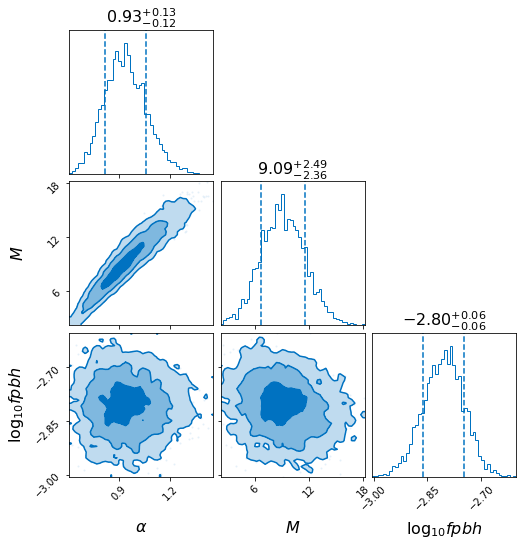

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=120)
result.plot_corner()


In [6]:
import numpy as np
np.exp(-1055.437-(-1055.587))

1.1618342427283888

In [7]:
10**(-2.8)

0.001584893192461114

In [8]:
import numpy as np
np.exp(-1055.437-(-1060.368))

138.51796106513135